In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [10]:
new_exp = pd.read_csv('../main/log/ngsm_20250228.csv', names=["algo", "experiment_id", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness", "elite_size", "log_level"])

In [14]:
colors = ['lightsalmon', 'lightblue', 'lightgreen']
e_colors = ['red', 'blue', 'green']

In [20]:
new_exp

,algo,experiment_id,dataset,seed,generation,training_fitness,timing,pop_node_count,test_fitness,elite_size,log_level
0,SLIM*ABS,6b20aa96-f5ec-11ef-98e8-72c976fed59b,toxicity,0,0,2330.037598,0.175741,1340.0,2184.658691,3,1
1,SLIM*ABS,6b20aa96-f5ec-11ef-98e8-72c976fed59b,toxicity,0,1,2319.801758,0.780452,2281.0,2176.456787,18,1
2,SLIM*ABS,6b20aa96-f5ec-11ef-98e8-72c976fed59b,toxicity,0,2,2312.871582,0.607309,3476.0,2179.392090,33,1
3,SLIM*ABS,6b20aa96-f5ec-11ef-98e8-72c976fed59b,toxicity,0,3,2306.685547,0.703486,4858.0,2170.369629,48,1
4,SLIM*ABS,6b20aa96-f5ec-11ef-98e8-72c976fed59b,toxicity,0,4,2305.481934,0.647375,6359.0,2172.359375,63,1
...,...,...,...,...,...,...,...,...,...,...,...
540604,SLIM+ABS,c7924e6a-f5ec-11ef-8b49-72c976fed59b,energy,29,996,2.698216,0.670554,515840.0,37.197773,5091,1
540605,SLIM+ABS,c7924e6a-f5ec-11ef-8b49-72c976fed59b,energy,29,997,2.698216,0.616305,516228.0,37.197773,5091,1
540606,SLIM+ABS,c7924e6a-f5ec-11ef-8b49-72c976fed59b,energy,29,998,2.698216,0.597617,516378.0,37.197773,5091,1
540607,SLIM+ABS,c7924e6a-f5ec-11ef-8b49-72c976fed59b,energy,29,999,2.693746,0.740298,516412.0,36.622700,5179,1


In [22]:
name_ds

'resid_build_sale_price'

In [24]:
algorithm

'SLIM+SIG2'

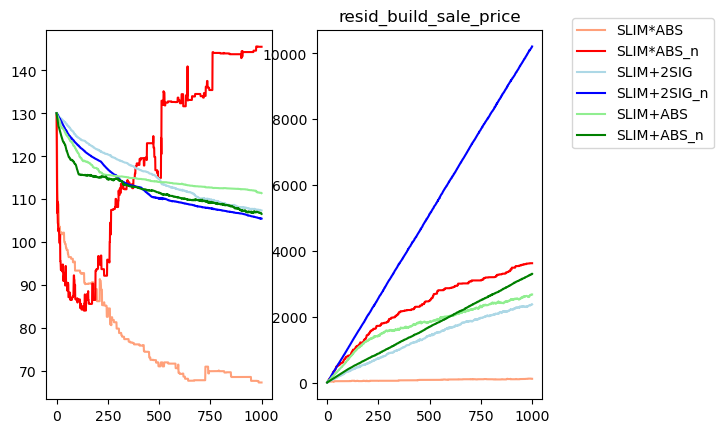

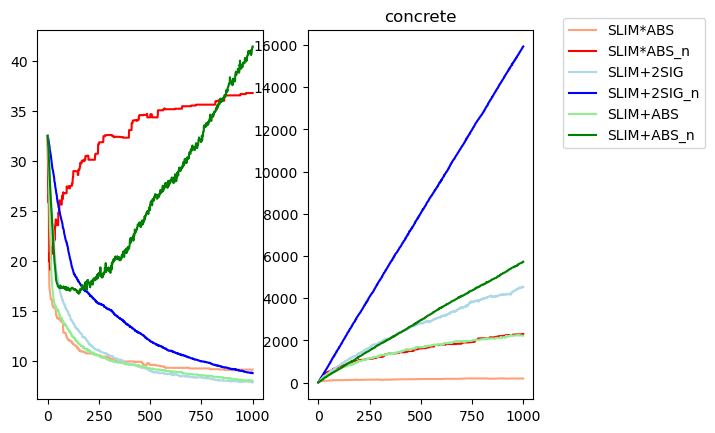

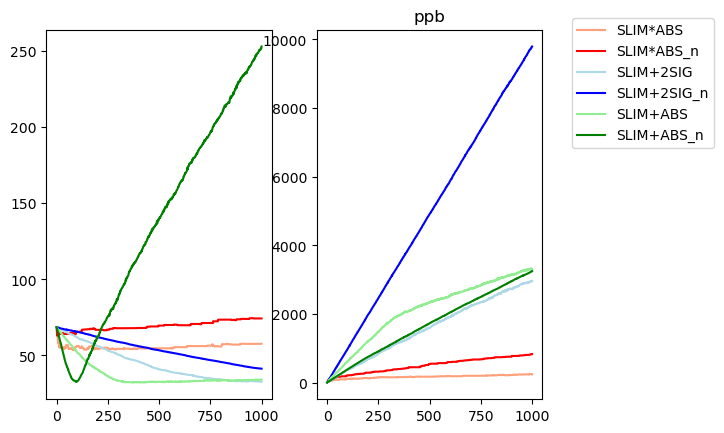

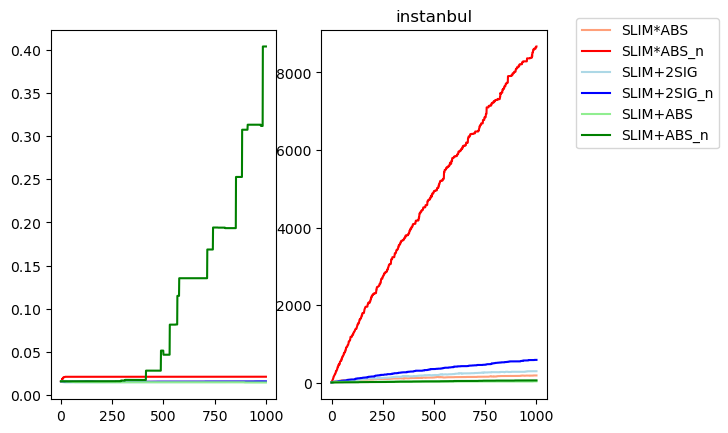

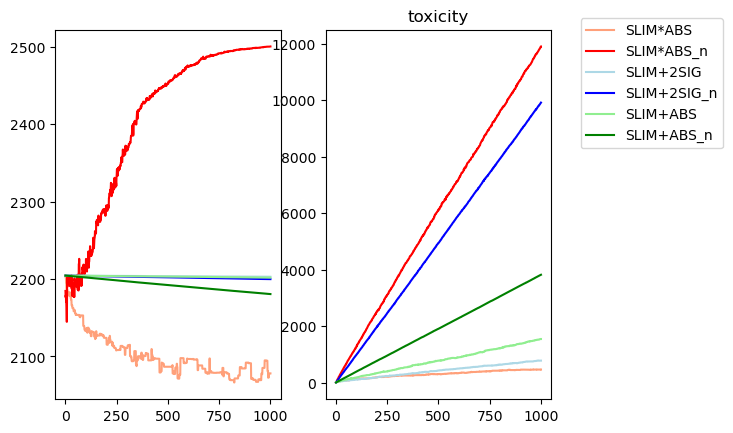

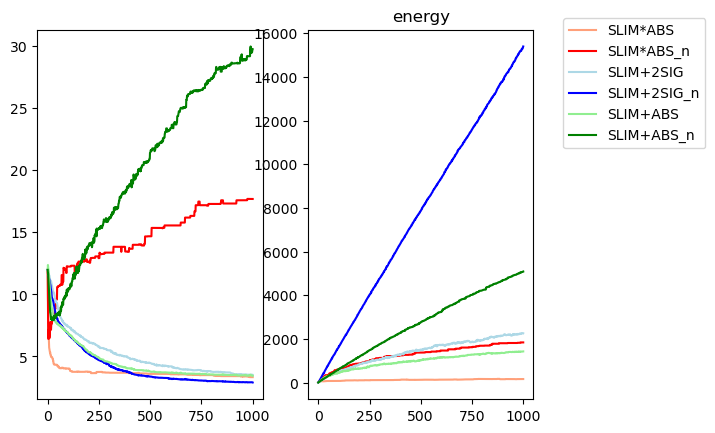

In [28]:
for name_ds in ["resid_build_sale_price","concrete", "ppb", "instanbul", "toxicity",  "energy"]:
    fig, (ax1, ax2) = plt.subplots(1, 2)

    csv_path = f'../main/log/res/results_def/slim_{name_ds}.csv'
    # Load data from the CSV file
    baseline = pd.read_csv(csv_path, names=["algo", "experiment_id", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness", "elite_size", "log_level"])
    
    # Example replacements
    baseline.replace({'algo': {'SlimGSGP_1_mul_False': 'SLIM*ABS',
                           'SlimGSGP_1_mul_True': 'SLIM*SIG1',
                           'SlimGSGP_1_sum_False': 'SLIM+ABS',
                           'SlimGSGP_1_sum_True': 'SLIM+SIG1',
                           'SlimGSGP_2_mul_False': 'SLIM*SIG2',
                           'SlimGSGP_2_sum_False': 'SLIM+2SIG'
                           }},
                 inplace=True)

    for i, algorithm in enumerate(['SLIM*ABS', 'SLIM+2SIG', 'SLIM+ABS']): #'SLIM*SIG1'

        b_data = baseline[(baseline['algo'] == algorithm)
        & (baseline['generation'] < 1001)] [['generation', 'test_fitness', 'elite_size']].groupby('generation').median()

        data = new_exp[(new_exp['dataset'] == name_ds) &
        (new_exp['algo'] == algorithm)][['generation', 'test_fitness', 'elite_size']].groupby('generation').median()

        ax1.plot(range(1001), b_data['test_fitness'].values, color = colors[i], label = algorithm)
        ax1.plot(range(1001), data['test_fitness'].values, color = e_colors[i], label = algorithm + '_n')

        ax2.plot(range(1001), b_data['elite_size'].values, color = colors[i], label = algorithm)
        ax2.plot(range(1001), data['elite_size'].values, color = e_colors[i], label = algorithm + '_n')

        ax2.legend(bbox_to_anchor=(1.1, 1.05))

    plt.title(name_ds)
    plt.show()


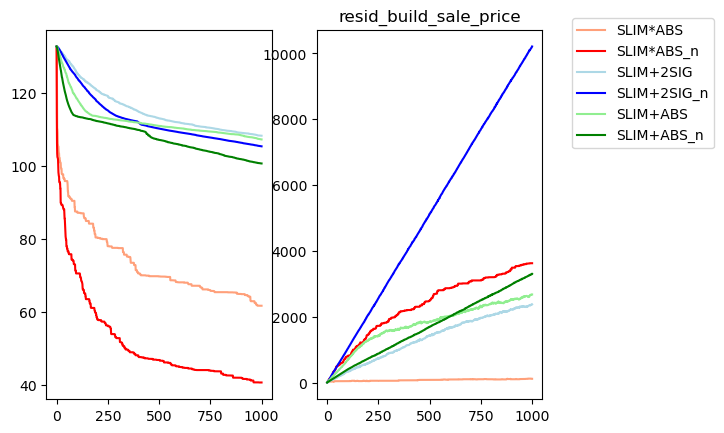

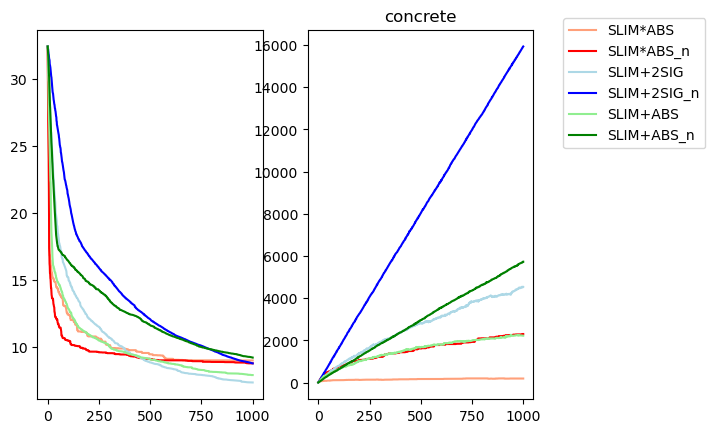

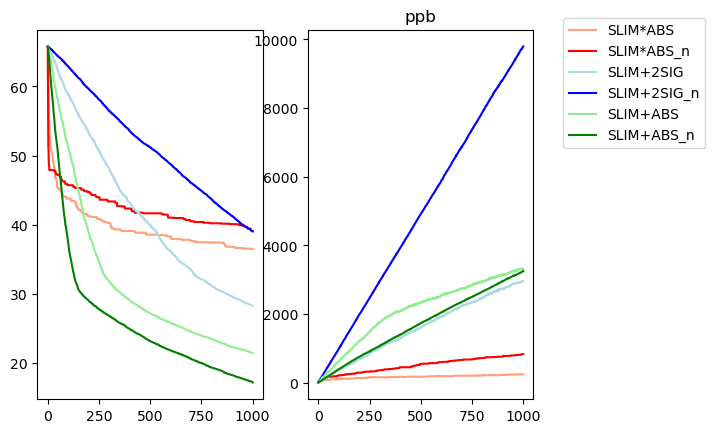

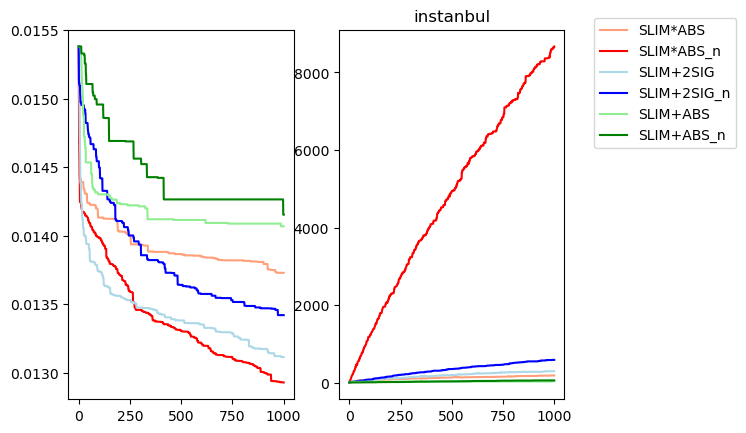

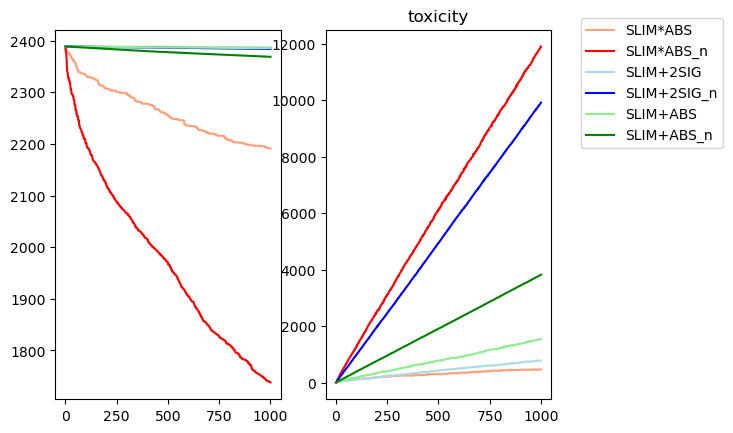

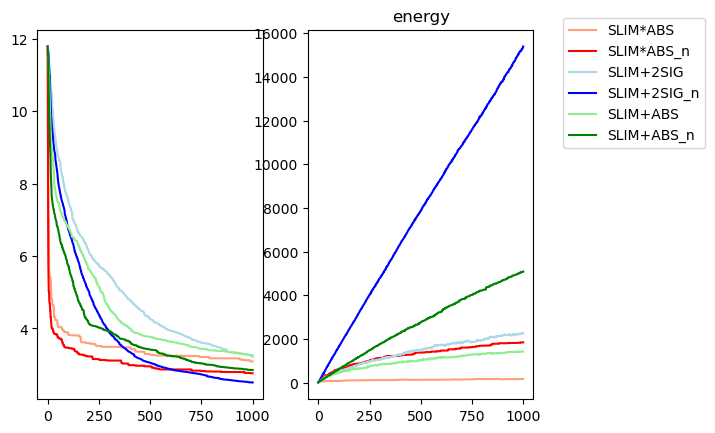

In [30]:
for name_ds in ["resid_build_sale_price","concrete", "ppb", "instanbul", "toxicity",  "energy"]:
    fig, (ax1, ax2) = plt.subplots(1, 2)

    csv_path = f'../main/log/res/results_def/slim_{name_ds}.csv'
    # Load data from the CSV file
    baseline = pd.read_csv(csv_path, names=["algo", "experiment_id", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness", "elite_size", "log_level"])
    
    # Example replacements
    baseline.replace({'algo': {'SlimGSGP_1_mul_False': 'SLIM*ABS',
                           'SlimGSGP_1_mul_True': 'SLIM*SIG1',
                           'SlimGSGP_1_sum_False': 'SLIM+ABS',
                           'SlimGSGP_1_sum_True': 'SLIM+SIG1',
                           'SlimGSGP_2_mul_False': 'SLIM*SIG2',
                           'SlimGSGP_2_sum_False': 'SLIM+2SIG'
                           }},
                 inplace=True)

    for i, algorithm in enumerate(['SLIM*ABS', 'SLIM+2SIG', 'SLIM+ABS']): #'SLIM*SIG1'

        b_data = baseline[(baseline['algo'] == algorithm)
        & (baseline['generation'] < 1001)] [['generation', 'training_fitness', 'elite_size']].groupby('generation').median()

        data = new_exp[(new_exp['dataset'] == name_ds) &
        (new_exp['algo'] == algorithm)][['generation', 'training_fitness', 'elite_size']].groupby('generation').median()

        ax1.plot(range(1001), b_data['training_fitness'].values, color = colors[i], label = algorithm)
        ax1.plot(range(1001), data['training_fitness'].values, color = e_colors[i], label = algorithm + '_n')

        ax2.plot(range(1001), b_data['elite_size'].values, color = colors[i], label = algorithm)
        ax2.plot(range(1001), data['elite_size'].values, color = e_colors[i], label = algorithm + '_n')

        ax2.legend(bbox_to_anchor=(1.1, 1.05))

    plt.title(name_ds)
    plt.show()
